# Image Classification Data
## Import libraries 

In [70]:
import pandas as pd 
import numpy as np 
import collections
import statistics 
import matplotlib.pyplot as plt

## Import Data as csv file and combine

In [82]:
# imports training data and assigns label to identify which training set it is 
data_train3 = pd.read_csv("/Users/brookeathey/OneDrive - Texas State University/Spring 2020/Data Science/Algorithims/train.3.txt",header=None, sep=',')
P = data_train3.shape[0] # gets number of rows in matrix 
label3 = [3]*P # creates a label 3 for all rows 
data_train3.insert(0,'label',label3) #inserts label into matrix 
#print(data_train3) # test print

data_train2 = pd.read_csv("/Users/brookeathey/OneDrive - Texas State University/Spring 2020/Data Science/Algorithims/train.2.txt",header=None, sep=',') 
R = data_train2.shape[0] 
label2 = [2] *R 
data_train2.insert(0,'label',label2)
#print(data_train2)

# Combine train 2 and train 3 data using .append 
data_train = data_train2.append(data_train3)
data_train = data_train.values
#print(data_train)


# import test data 
data_test = pd.read_csv("/Users/brookeathey/OneDrive - Texas State University/Spring 2020/Data Science/Algorithims/zip.test",header=None, sep=' ')
#print(data_test)
data_test = data_test.rename(columns={0: 'label'})
#print(data_test)
data_test = data_test[(data_test.label == 2) | (data_test.label == 3)]
data_test = data_test.values
#print(data_test)

## K- Nearest Neighbor Algorithim

In [119]:
correctness = []
error_vector = []
kvec = [1,3,5,7,9,11,13,15,17,19]
for K in kvec:
    for i in data_test:
        #print(i[0])
        difference = []
        for j in data_train:
            distance = np.linalg.norm(i[1:len(i)-1]-j[1:len(j)-1])
            difference.append((distance, j[0]))
        difference.sort(key=lambda x: x[0])
        nearest = [difference[t] for t in np.arange(0, K)]
        twos = 0
        #print(nearest)
        for q in nearest:
            if(q[1] == 2):
                twos = twos + 1
        if(twos/K > 0.5):
            if(i[0] == 2):
                correctness.append(1)
                #print('correct')
            else:
                correctness.append(0)
                #print('incorrect')
        else:
            if(i[0] == 3):
                correctness.append(1)
                #print('correct')
            else:
                correctness.append(0)
                #print('incorrect')
        #print('###############################')
    correct = sum(correctness)
    total = len(correctness)
    #print(total)
    #correctness.append(correct)
    #print(correct)
    error = 100*(total-correct)/total
    #print(error)
    error_vector.append(error)
    print(error_vector)

[2.4725274725274726]
[2.4725274725274726, 2.7472527472527473]
[2.4725274725274726, 2.7472527472527473, 2.838827838827839]
[2.4725274725274726, 2.7472527472527473, 2.838827838827839, 2.9532967032967035]
[2.4725274725274726, 2.7472527472527473, 2.838827838827839, 2.9532967032967035, 3.076923076923077]
[2.4725274725274726, 2.7472527472527473, 2.838827838827839, 2.9532967032967035, 3.076923076923077, 3.159340659340659]
[2.4725274725274726, 2.7472527472527473, 2.838827838827839, 2.9532967032967035, 3.076923076923077, 3.159340659340659, 3.2574568288854002]
[2.4725274725274726, 2.7472527472527473, 2.838827838827839, 2.9532967032967035, 3.076923076923077, 3.159340659340659, 3.2574568288854002, 3.331043956043956]
[2.4725274725274726, 2.7472527472527473, 2.838827838827839, 2.9532967032967035, 3.076923076923077, 3.159340659340659, 3.2574568288854002, 3.331043956043956, 3.3882783882783882]
[2.4725274725274726, 2.7472527472527473, 2.838827838827839, 2.9532967032967035, 3.076923076923077, 3.15934065

## Plot results from KNN

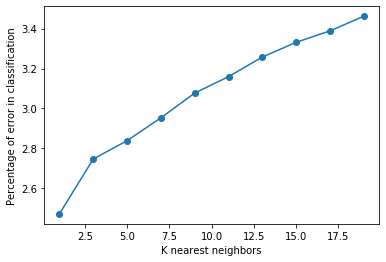

In [69]:
plt.plot(kvec,error_vector, '-o')
plt.xlabel('K nearest neighbors')
plt.ylabel('Percentage of error in classification')
plt.show()

## Linear Regression Method

In [107]:
#get x and y components of data
data_train_y = data_train[:,0]
data_train_x = data_train[:,1:]
print(data_train_x.shape)
print(data_train_y.shape)

data_test_y = data_test[:,0]
data_test_x = data_test[:,1:]
print(data_test_y.shape)
print(data_test_x.shape)


(1389, 256)
(1389,)
(364,)
(364, 256)


## Linear Regression Algorithim

In [124]:
data_train_xT = np.transpose(data_train_x)
#print(data_train_xT)

A = data_train_xT .dot(data_train_x)
print(A.shape)

b = data_train_xT .dot (data_train_y)
print(b.shape)

beta = np.linalg.solve(A,b)
print(beta.shape)

#Try test data with linear model 
result = data_test_x .dot (beta)
#print(result)

#Calculate Error 
difference_vector = np.subtract(result,data_test_y)**2
print(difference_vector)
print(np.sum(difference_vector))

#error_vector = np.divide(difference_vector,data_test_y)*100
#print(error_vector)

(256, 256)
(256,)
(256,)
[7.77019298e-03 2.64434676e-03 1.09884760e-01 2.41079477e-02
 3.09201075e-02 4.46655150e-02 6.07346258e-02 6.44889889e-02
 2.64512040e-02 1.25744638e-04 1.12845045e-01 7.31954210e-03
 1.24466404e-02 7.74023721e-02 4.95988388e-03 7.92115848e-02
 1.15850885e-01 1.53469038e-01 9.21571196e-03 3.92787212e-05
 6.06177767e-02 1.04515157e-02 5.05612873e-02 4.93536723e-03
 7.53696234e-02 2.60273709e-02 6.59024901e-01 1.69419191e-03
 4.13740221e-02 8.59494934e-02 1.36893607e-02 8.86736423e-05
 9.66575595e-02 7.00255984e-03 3.73257100e-03 4.99934516e-02
 4.43099036e-03 3.60706433e-02 4.03192453e-03 1.11028130e-01
 2.19597293e-03 1.90620038e-01 6.72725633e-04 1.50997657e-05
 1.97601180e-02 9.19835451e-03 6.45036808e-02 3.12022676e-02
 1.21376281e-05 2.85126138e-02 5.47389713e-01 9.71562749e-03
 7.02547458e-02 1.87696037e-01 1.00158685e-02 1.71989955e-02
 4.91479490e-02 3.74335924e-02 2.06411531e-03 1.63229174e-01
 2.50417232e-01 1.80260401e-02 1.49120239e-02 3.57546298e-03

## Logistic Regression